# Klassifikation im Datensatz MNIST



## Inhaltsverzeichnis

1. **Konfiguration**
2. **Der MNIST\-Datensatz**
   1. Laden des MNIST\-Datensatzes
   2. Der rohe MNIST\-Datensatz
      1. Labeldateien
      2. Imagedateien
3. **Allgemeine Informationen über künstliche neuronale Netze**
   1. Arten von neuronalen Netzen
      1. Das künstliche Neuron
      2. feed forward neural network
      3. recurrent neural networks
      4. convolutional neural networks
   2. Aktivierungsfunktionen
      1. Schwellenwertfunktion
      2. lineare Funktion
      3. Sigmoid\-Funktion
      4. Tanh\-Funktion
      5. Rectified Linear Unit \(ReLU\)
      6. Softmax
   3. Verlustfunktionen
      1. Kreuzentropie
   4. Gradientenabstiegsverfahren
   5. Backpropagation
4. **MNIST Modell**
   1. Flatten
   2. Dense
   3. Dropout
   4. Optimizer
   5. Loss
   6. Metrics
   7. Fit
   8. Evaluate
   9. Predict
   10. Relevanz
   11. Sensitivität
   12. F\-Score
5. **Das zweite MNIST Modell**
   1. Sequential
   2. Conv2D
   3. Filter
   4. MaxPooling2D
   5. Relevanz
   6. Sensitivität
   7. F\-Score
6. **Fazit**
7. **Quellenverzeichnis**



## Konfiguration



Importieren wir zunächst alles, was für alle folgenden Quelltexte benötigt wird.


In [1]:
import numpy as np
import tensorflow as tf
import gzip
import matplotlib.pyplot as plt
from IPython.display import Image
print("Konfiguration abgeschlossen")

Konfiguration abgeschlossen


# Der MNIST Datensatz

Der MNIST Datensatz ist einer der bekanntesten Datensätze für maschinelles Lernen.

Der Datensatz umfasst insgesamt 70000 von Hand geschriebene Ziffern in schwarz\-weiß sowie die dazugehörigen Labels, welche angeben um welche Zahl es sich bei einem Bild handelt. Dieser Datensatz lässt sich in Trainings\- und Testdatensatz unterteilen, wobei der Trainingsdatensatz 60000 und der Testdatensatz 10000 Daten umfasst. 



## Laden des MNIST Datensatzes



In [2]:
# Trainingsdaten
print("Die Trainingsdaten werden nun geladen")
print("-"*41+"\n")
with gzip.open("train-labels-idx1-ubyte.gz") as file:
    train_labels = np.frombuffer(file.read(), np.uint8(), offset=8)
    print("Das Laden der Testlabels war erfolgreich")
with gzip.open("train-images-idx3-ubyte.gz") as file:
    train_images = np.frombuffer(file.read(), np.uint8(), offset=16).reshape(len(train_labels), 28, 28) / 255
    print("Das Laden der Testimages war erfolgreich")
# Testdaten
print("\n" + "Die Testdaten werden nun geladen")
print("-"*41+"\n")
with gzip.open("t10k-labels-idx1-ubyte.gz") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)
    print("Das Laden der Testlabels war erfolgreich\n")
with gzip.open("t10k-images-idx3-ubyte.gz") as file:
    test_images = np.frombuffer(file.read(), np.uint8, offset=16).reshape(len(test_labels), 28, 28) / 255
    print("Das Laden der Testimages war erfolgreich")
print("\n"+"Das Laden des MNIST-Datensatzes ist abgeschlossen")

test_images = np.reshape(test_images, (-1, 28, 28, 1))
train_images = np.reshape(train_images, (-1, 28, 28, 1))

Die Trainingsdaten werden nun geladen
-----------------------------------------

Das Laden der Testlabels war erfolgreich
Das Laden der Testimages war erfolgreich

Die Testdaten werden nun geladen
-----------------------------------------

Das Laden der Testlabels war erfolgreich

Das Laden der Testimages war erfolgreich

Das Laden des MNIST-Datensatzes ist abgeschlossen


### Der rohe MNIST Datensatz

Der MNIST Datensatz ist verfügbar unter [http://yann.lecun.com/exdb/mnist/](https://yann.lecun.com/exdb/mnist/) und liegt hierbei in Rohform vor. Auf der Seite lassen sich 4 Dateien finden: Die Trainingslabels und \-images sowie die Testlabels und \-images. 

Um die Datensätze zum Trainings eines Modells verwenden zu können müssen diese aus den Rohdateien extrahiert werden. 

Diese Dateien liegen als .ubyte Dateien vor, das heißt, dass diese aus eine Folge von 8\-bit unsigned integer bestehen, welche einen Wert zwischen 0 und 255 annehmen können. Dies lässt sich anhand der Transformation von Zahlen zwischen dem binären Zahlensystem und dem Dezimalsystem schlussfolgern 00000000 binär stellt hierbei 0 dezimal dar. 11111111 binär stellt hierbei 255 dezimal dar. Jede der 4 Dateien beginnt mit einem 32\-bit integer, der "magicnumber", welche als Kennung dient und bei den Labeldateien 2049 und bei den Imagedateien 2051 entspricht. Gefolgt wird diese "magicnumber" von einem weiteren 32\-bit integer der Anzahl von Daten in diesem Datensatz, bei den Trainingsdaten also 60000und bei den Testdaten 10000.



#### Labeldateien

Nach der "magicnumber" und der Anzahl der Daten in dem Datensatz  folgt eine Folge von 8\-bit unsigned integer. Diese enthalten einen Wert zwischen 0 und 9 und geben an, welche Zahl durch ein Bild tatsächlich dargestellt werden soll. Um diese verwenden zu können, wird ein Array erstellt, dessen Länge gleich der Anzahl der Daten in dem Datensatz ist.  len\(train\_labels\) würde also den Wert 60000 liefern und len\(test\_labels\) den Wert 10000. Jedes Element des Arrays ist ein 8\-bit unsigned integer, welches den Wert des Labels enthält. 



#### Imagedateien

Nach der "magicnumber" und der Anzahl der Daten im Datensatz folgen bei den Imagedateien zwei weitere 32\-bit integer, welche die Informationen über die Anzahl der Pixel eines Bildes beinhalten: 28 pro Zeile und 28 pro Spalte, also eine Gesamtanzahl von 784 Pixeln pro Bild. Ein 8\-bit unsigned Integer kann wie bereits erwähnt Ganzzahlen zwischen 0 und 255 abbilden. Dies entspricht den Werten des Grauwert\-Wertebereichs, bei welchem 0 für weiß und 255 für schwarz steht. Der Wert, welcher in einem Byte gespeichert ist entspricht also dem Grauwert eines Pixels. Die Pixel sind hierbei Zeilenweise gespeichert, um das Bild der ersten Zahl zu konstruieren braucht man also die ersten 784 Byte, welche auf die Anzahl der Spalten folgen. Hierbei stellen die ersten 28 Byte die erste Pixelzeile des Bildes dar, die zweiten 28 Pixel die zweite und so weiter.  Würde man hier genauso verfahren wie bei den Labeldatein und würde ebenfalls ein eindimensionales Array erstellen, so würde dies bei den Trainingsimages 47.040.000 Elemente enthalten und bei den Testimages 7.840.000. Dies lässt sich jedoch vereinfachen, indem jedes Element des eindimensionalen Arrays kein 8\-bit unsigned Integer ist, sondern ein zweidimensionales Array mit den Werten 28\*28, bildlich gesprochen also ein Bild einer handgeschrieben Ziffer. len\(train\_images\) würde also den Wert 60000 zurückliefern, jedoch ist an jeder Stelle des Arrays nicht wie bei den train\_labels ein 8\-bit unsigned integer, sondern ein zweidimensionales Array. 


Klasse: 9


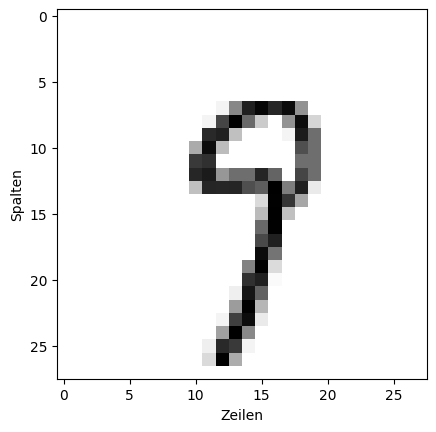

Auflösung des Bildes: 28 * 28 
Gesamtanzahl der Pixel: 784


In [3]:
n = 1500
print("Klasse:", train_labels[n])
ziffer = train_images[n]
ziffer = ziffer.reshape(28, 28)
plt.imshow(ziffer, cmap = plt.cm.binary,
           interpolation="nearest")
plt.xlabel("Zeilen")
plt.ylabel("Spalten")
plt.show()
print("Auflösung des Bildes:",len(ziffer),"*",len(ziffer[0]),"\nGesamtanzahl der Pixel:", len(ziffer)*len(ziffer[0]))

Dieses Bild dient zur beispielhaften Visualisierung einer handgeschriebenen Ziffer, welche Teil des MNIST\-Datensatzes ist.



# Allgemeine Informationen über künstliche neuronale Netze

Ein künstliches neuronales Netz besteht aus vielen miteinander verbundenen künstlichen Neuronen und ist unserem Gehirn nachempfunden. Bei dieser Veranschaulichung entsprechen die Neuronen in unserem Gehirn den künstlichen Neuronen im neuronalen Netz. Die Synapsen im Gehirn stellen in unserem Modell die Verbindungen zwischen den künstlichen Neuronen dar. Die Dendriten des biologischen Neurons lassen sich mit den Inputs des künstlichen Neurons und das Axon mit dem Output des künstlichen Neurons. Die Gesamtstruktur, das künstliche neuronale Netz lässt sich mit unserem Gehirn vergleichen.



## Arten von neuronalen Netzen

Es gibt verschiedene Arten von künstlichen neuronalen Netzen. 

Das einfachste künstliche neuronale Netz ist das _Perzeptron_ \(engl. _Perceptron_\), ein neuronales Netz bestehend aus einem einzigen künstlichen Neuron.



### Das künstliche Neuron

Das künstliche Neuron ähnelt sehr dem biologischen Neuron. Das biologische Neuron bekommt über die Dendriten ein elektrisches Signal, welches dann im Zellkern verarbeitet wird und anschließend über das Axon weitergegeben wird. Diese Elemente lassen sich auch bei einem künstlichen Neuron wiederfinden. Am Besten lässt sich dies anhand einer Abbildung von Franck Rosenblatt, dem Erfinder des Perzeptrons verdeutlichen.



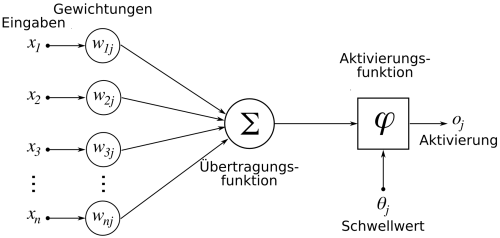

In [4]:
display(Image("Abbildung 1.png"))

[https://upload.wikimedia.org/wikipedia/commons/7/7f/ArtificialNeuronModel\_deutsch.png](https://upload.wikimedia.org/wikipedia/commons/7/7f/ArtificialNeuronModel_deutsch.png) 

Jedes Neuron hat eine oder auch mehrere Eingaben \(in der Abbildung: $x_1, x_2, x_3, ..., x_n$\) diese Eingaben entsprechen den elektrischen Signalen, welche ein biologisches Neuron über die Dendriten empfängt. 

Diese Eingaben werden mit den entsprechenden Gewichten \(in der Abbildung: $w_1, w_2, w_3, ..., w_n$\) multipliziert. Die Gewichte werden entweder als inhibitorisch \(hemmend\) oder exzitatorisch \(erregend/stimulierend\) bezeichnet, da die Gewichtungen die Eingabewerte entweder verstärken oder abschwächen können.  Die Übertragungsfunktion addiert die Produkte alle Eingaben mit ihren Gewichten. Die Übertragungsfunktion, deren Ergebnis im Folgenden als $\alpha$ bezeichnet wird, lässt sich also mathematisch wie folgt darstellen. $\alpha = \sum^n_{i=1} x_i * w_i$ 


### feed forward neural network

Im ersten Versuch verwenden wir das _**feed forward neural network**_**,** welches eines der ältesten Arten von künstlichen neuronalen Netzen ist. In diesen Fall sind die Neuronen aus der einen Schicht lediglich mit der Neuronen in der nächsten Schicht verbunden. Es sind zwar alle Neuronen verbunden, jedoch gibt es in dieser Netzform keine Kanten, welche von einer Schicht auf die vorherige wirken können, da die Aktivierung von Eingangs\- zu der Ausgangsschicht läuft.


### recurrent neural network

Die _**recurrent neural networks**_ besitzen die Eigenschaften, dass sie eine Art Gedächtnis durch wiederkehrende Zellen erhalten, welche bei jedem Durchlauf wiederkehren und sich so vorherige Schritte beeinflussbar bleiben. _Recurrent neural networks_ werden gerne verwendet, wenn es eine genauen Kontext gibt, für den diese Eigenschaften des Netzes benötigt werden. Diese Netzform ist also in der Lage innerhalb einer Schicht sowie zu den Neuronen in den Schichten davor und danach Verbindungen herzustellen. Oft findet man diese Netzart im Kontext einer Entdeckung von zeitlich codierten Informationen in einer Datenmenge wieder. Die rekurrenten Netze lassen sich zusätzlich in folgende Rückkopplungen unterteilen. Die direkte Rückkopplung verwendet den Ausgang eines künstlichen Neurons als weiteren Eingang von diesem. Bei der indirekten Rückkopplung wird der Ausgangswert eines Neurons als weiterer Eingangswert für ein Neuron der vorherigen Schicht verwendet. Die seitliche Rückkopplung hat die Eigenschaft, dass ein Ausgangswert eines Neurons einen Eingangswert eines Neurons derselben Schicht darstellt. Hat jedes Neuron eine Verbindung zu allen anderen Neuronen aller Schichten, spricht man von einer vollständigen Verbindung innerhalb des Netzes.


### convolutional neural networks

Als eine weitere populäre Form \(gerade bei der Bilderkennung\) der künstlichen neuronalen Netze ist das _**convolutional neural networks**_ \(faltende neuronale Netze\), da diese Netzform sehr gut mit mehrdimensionalen Eingabedaten \(wie beispielsweise mehrdimensionalen Arrays\) umgehen kann. Die Besonderheit bei _convolutional neural networks_ ist, dass in den sogenannten _hidden layers_ bestimmte Abfolgen von Filter\- und Poolingoperationen \(Kapitel 5.5\) durchgeführt werden, welche es ermöglichen, die Gewichtungen der künstlichen Neuronen gezielt zu Verändern und danach mithilfe der Poolingoperation zu vereinfachen \(Kapitel 5.3\). Diese Funktionen sind von hoher Bedeutung, da dadurch die Eingabedaten vereinfacht und komprimiert werden können. Am Ende ergibt sich daraufhin aus diesen Schritten in der Ausgabeschicht ein Vektor, welcher dann für die genaue Zuordnung der Wahrscheinlichkeiten für die genauen Ziffern wichtig ist. Durch die Filter werden bestimmte Stellen innerhalb des Bildes hervorgehoben \(Kapitel 5.4\).

Das neuronale Netz wird dann insbesondere darauf trainiert diese Stellen zu erkennen und anhand dieser Stellen in unserem Fall die Ziffer zu identifizieren. Dies hat zur Folge, dass eine Ziffer nicht anhand der linearisierten Pixelfolge mit den Helligkeitswerten erkannt wird, sondern anhand der Kanten und Linienführung der Ziffern erkannt wird.



## Aktivierungsfunktionen

Es gibt verschiedene Arten von Aktivierungsfunktionen bei einem künstlichen Neuron, im Folgenden werden einige behandelt. 



### Schwellenwertfunktion

Die Schwellenwertfunktion ist keine mathematische Funktion, sondern eher mit einem Boolean, also Wahrheitswert, zu vergleichen. Die Funktion kann hierbei nur 2 Werte annehmen 0 und 1. Die Funktion nimmt den Wert 1 an, wenn $\alpha \geq 0_j$ also größer als der Schwellwert ist. 


### lineare Funktion

Es gibt zwei Arten von linearen Aktivierungsfunktionen: Aktivierungsfunktionen, welche vollkommen linear sind und Aktivierungsfunktionen, welche nur abschnittsweise linear sind. Lineare Aktivierungsfunktionen können, wie der Name vermuten lässt nur einen linearen Zusammenhang zwischen Input und Output modellieren. Abschnittsweise lineare Funktionen beinhalten eine lineare Funktion, welche jedoch begrenzt ist.

Beispiel:

$\phi_{(\alpha)}=
\left\{
\begin{matrix}
-1 \ wenn \ \alpha \leq -1\\
1 \ wenn \ \alpha \geq 1\\\
m * \alpha \ wenn \ \alpha < 1 \ and \ \alpha > -1
\end{matrix}
\right\}$



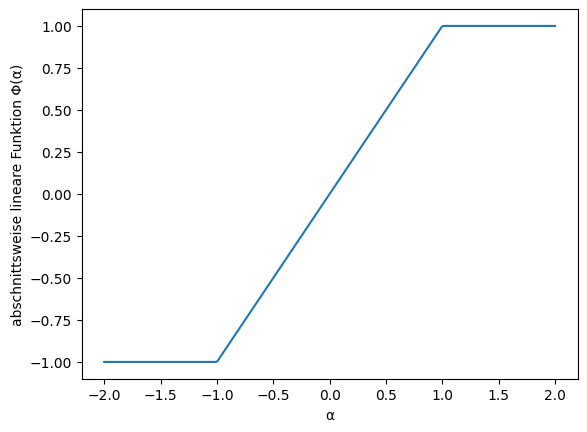

Abbildung abschnittsweise lineare Funktion


In [5]:
x = np.linspace(-2, 2, 300)
y = [-1]*300

for z in range(300):
    if x[z] > -1 and x[z]<1:
        y[z]= x[z]
    elif x[z] >= 1:
        y[z] = 1

plt.plot(x, y)
plt.xlabel("α")
plt.ylabel("abschnittsweise lineare Funktion Φ(α)")

plt.show()
print("Abbildung abschnittsweise lineare Funktion")

### Sigmoid\-Funktion

Die Sigmoid\-Funktion ist eine Funktion, welche die Werte der Übertragungsfunktion auf einer Skala von 0 bis 1 abbildet. Hierbei sieht die mathematische Funktion der einfachen Sigmoid\-Funktion wie folgt aus: $\phi_{(\alpha)} = \frac{1}{1+e^{-\alpha}}$  \(siehe Abbildung Sigmoid\-Funktion\)



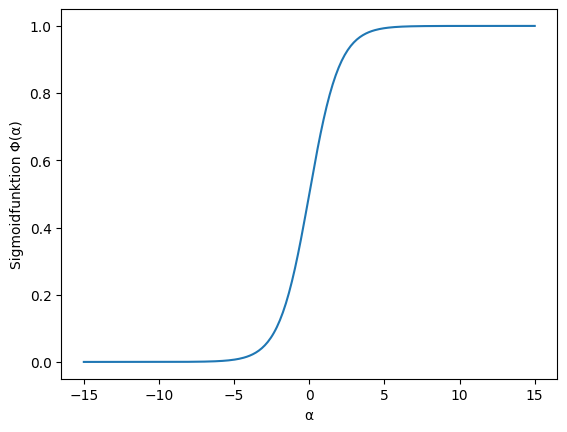

Abbildung Sigmoid-Funktion


In [6]:
x = np.linspace(-15, 15, 300)
y = list(map(lambda x: 1 / (1 + np.exp(-x)), x))

plt.plot(x, y)
plt.xlabel("α")
plt.ylabel("Sigmoidfunktion Φ(α)")

plt.show()
print("Abbildung Sigmoid-Funktion")

Die Sigmoid\-Funktion hat jedoch zwei Nachteile. Die Funktion nähert sich für für $\lim_{\alpha\to\infty}\ {\phi_{(\alpha)}\to1}$ und für $\lim_{\alpha\to-\infty}\ {\phi_{(\alpha)}\to0}$. Durch dieses Verhalten im Unendlichen folgt für wie Ableitungsfunktion $\phi'_{(\alpha)}$ :  $\lim_{\alpha\to\infty}\ {\phi'_{(\alpha)}\to0}$ und $\lim_{\alpha\to-\infty}\ {\phi'_{(\alpha)}\to0}$

Dies hat zur Folge, dass die Anpassung der Gewichte und damit der Lernprozess des künstlichen Neuronalen Netzes stark verlangsamt oder verhindert wird, wenn die Werte für $\alpha$ sehr groß oder sehr klein werden, da beim Gradientenabstiegsverfahren nach einem lokalen und/oder globalen Minimum der Ableitungsfunktion gesucht wird. Die Ableitungsfunktion der Sigmoid\-Funktion hat jedoch kein globales Minimum, sondern nur ein globales Maximum für $\alpha = 0$ . Da sich $\phi'_{(\alpha)}$ für immer größer oder kleinere Werte für $\alpha$ sich immer näher an die x\-Achse anschmiegt, gibt es auch kein echtes globales Minimum, da die Funktion $\phi'_{(\alpha)}$ nie den Wert 0 annimmt. 

Der Zweite Nachteil der Funktion ist, dass sie nicht Nullzentriert also nicht punktsymmetrisch zum Ursprung des Koordinatensystems ist, sondern Punktsymmetrisch zum Punkt \[0|0.5\]. Daher gilt $\forall \phi_{(\alpha)} : \phi_{(\alpha)} > 0$

Dies hat zur Folge, dass ein Layer in einem neuronalen Netz von einem vorherigen Layer, welches die Sigmoid\-Funktion als Aktivierungsfunktion genutzt hat nur positive Inputs bekommt. Dadurch ist, abhängig vom Gradienten des gesamten Ausdrucks, der Gradient für die Gewichte entweder positiv für alle Gewichte des Neurons oder negativ  für alle Gewichte des Neurons. Dies hat zur Folge, dass entweder alle Gewichte des Neurons erhöht werden oder alle Gewichte des Neurons gesenkt werden. Häufig wäre jedoch das Optimum die Anhebung eines und die Absenkung eines anderen Gewichtes, dies ist jedoch nicht möglich. 



### Tanh\-Aktivierungsfunktion

Die Tanh\-Aktivierungsfunktion ist der Sigmoid\-Funktion sehr ähnlich und liefert Werte $-1 < \alpha < 1$ . Die Gleichung der Tanh\-Funktion sieht wie folgt aus: $\phi_{(\alpha)} = \frac{e^x-e^{-x}}{e^x+e^{-x}}$



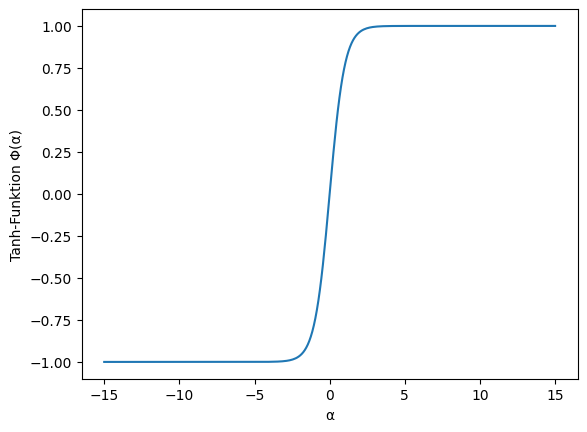

Abbildung Tanh-Funktion


In [7]:
x = np.linspace(-15, 15, 300)
y = list(map(lambda x: (np.exp(x) - np.exp(-x))/ (( np.exp(x) + np.exp(-x))), x))

plt.plot(x, y)
plt.xlabel("α")
plt.ylabel("Tanh-Funktion Φ(α)")

plt.show()
print("Abbildung Tanh-Funktion")

Die Tanh\-Funktion hat, ebenso wie die Sigmoid\-Funktion den Nachteil, dass die Werte der Ableitungsfunktion für sehr große oder sehr kleine Werte für $\alpha$ sehr klein werden. Dies gilt weil: $\lim_{\alpha\to\infty}\ {\phi_{(\alpha)}\to1}$ und $\lim_{\alpha\to-\infty}\ {\phi_{(\alpha)}\to-1}$ weshalb für die Ableitungsfunktion $\phi'_{(\alpha)}$ folgt: $\lim_{\alpha\to\infty}\ {\phi'_{(\alpha)}\to0}$ und $\lim_{\alpha\to-\infty}\ {\phi'_{(\alpha)}\to0}$ dies führt, wie bereits beschrieben dazu, dass der Gradient für sehr große oder sehr kleine Werte für $\alpha$ sich 0 annähert, wodurch die Anpassung der Gewichte und damit der Lernprozess des neuronalen Netzes stark verlangsamt oder sogar verhindert wird. Ebenso wie die Ableitung der Sigmoid\-Funktion hat auch die Ableitung der Tanh\-Funktion kein lokales oder globales Minimum, sondern nur ein globales Maximum für $\alpha = 0$ 

Einen Vorteil hat die Tanh\-Funktion jedoch gegenüber der Sigmoid\-Funktion. Im Gegensatz zur Sigmoid\-Funktion ist die Tanh\-Funktion Nullzentriert, das heißt punktsymmetrisch zum Ursprung des Koordinatensystems, weshalb gilt $\forall \phi_{(\alpha)} : -1 <\phi_{(\alpha)} < 1$ somit kann der Output von Neuronen in einem Layer, welches die Tanh\-Funktion nutzt sowohl positiv als auch negativ sein. Weshalb auch eine Erhöhung von einem Gewicht und eine Absenkung eines anderen Gewichts beim selben Neuron möglich ist. Deshalb wird die Tanh\-Funktion in der Regel der Sigmoid\-Funktion vorgezogen, da der Lernprozess von neuronalen Netzen, welche die Tanh\-Funktion nutzen, schneller ist als der Lernprozess von neuronalen Netzten, welche die Sigmoid\-Funktion nutzen



### Rectified Linear Unit \(ReLU\)

Bei der ReLU\-Funktion handelt es sich um eine abschnittsweise lineare Funktion, da es sich hierbei jedoch um eine besondere abschnittsweise lineare Funktion handelt, behandeln wir diese hier näher:

$\phi_{(\alpha)}=
\left\{
\begin{matrix}
\alpha \ wenn \ \alpha > 0 \\
0 \ wenn \ \alpha \leq 0
\end{matrix}
\right\}$



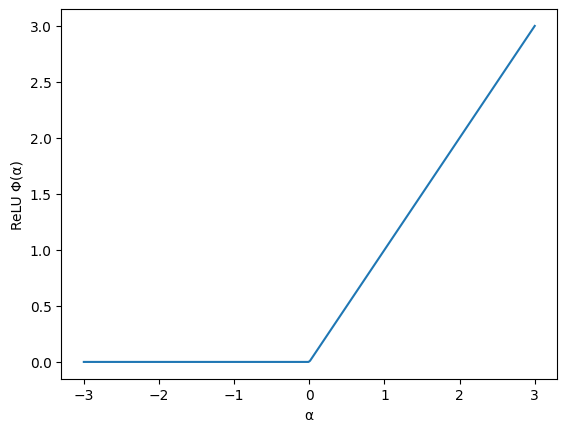

Abbildung ReLU-Funktion


In [8]:
x = np.linspace(-3,3,300)
y = np.maximum(0,x)
plt.plot(x,y)
plt.xlabel("α")
plt.ylabel("ReLU Φ(α)")

plt.show()
print("Abbildung ReLU-Funktion")

Die ReLu\-Funktion hat einen entscheidenden Vorteil gegenüber der Sigmoid\-Funktion. Die Problematik, dass bei der Simoid\-Funktion der Gradient für immer größer oder immer kleinere Werte von $\alpha$ nahezu verschwindet beziehungsweise sich 0 annähert, da $\phi'_{(\alpha)}$ für immer größer oder immer kleiner werdendes $\alpha$ sich der x\-Achse annähert. Im Gegensatz dazu hat die ReLU\-Funktion für alle Werte $\alpha > 0$  einen konstanten Gradienten,  da die ReLU Funktion sich für alle Werte $\alpha \geq 0$ auch mit einer linearen Funktion beschreiben ließe, deren Ableitung einen konstanten Wert liefert. Dieser konstante Gradient führt zu einem schnelleren Lernvorgang, da der Gradient nicht "verschwindet" wie dies bei der Sigmoid\-Funktion oder der Tanh\-Funktion der Fall ist. 


### Softmax

Die Softmax\-Aktivierungsfunktion unterscheidet sich von den anderen Aktivierungsfunktionen, da bei dieser Funktion die Werte der anderen Neuronen im selben Layer eine Rolle spielen. Anhand der Werte in den Neuronen, wird eine Wahrscheinlichkeit berechnet, die Summe der Outputs aller Neuronen in einem Layer beträgt also 1. Die Softmax\-Funktion wird sehr häufig bei Klassifizierungen für das Output\-Layer verwendet wird, da dadurch die Wahrscheinlichkeit errechnet wird zu wie viel Prozent etwas ein bestimmtes Objekt oder um beim Beispiel des MNIST\-Datensatzes zu bleiben zu wie viel Prozent der Input eine bestimmte Ziffer darstellt. 

Aufgrund dessen hat das Output Layer des neuronalen Netzes, welches mithilfe des MNIST Datensatzes trainiert wurde, 10 Neuronen wobei jedes Neuron errechnet, zu welcher Wahrscheinlichkeit der Input eine bestimmte Ziffer ist. Jedes Neuron im Output Layer hat also im Prinzip eine fest zugewiesene Ziffer für welche mithilfe der Softmax\-Funktion die Wahrscheinlichkeit berechnet wird, dass eben diese Ziffer durch den Input abgebildet werden soll. 

Die mathematische Formel für die Berechnung der Werte lautet:

$\sigma = \frac{e^{\alpha_j}}{\sum^n_{i=1} e^{\alpha_i}}$

Der Output des j\-ten Neurons in einem Layer ist also der Potenzwert der eulerschen Zahl mit dem Exponenten $\alpha_j$ , welches den Wert der Übertragungsfunktion im j\-ten Neuron des Layers darstellt, geteilt durch die Summe aller Potenzwerte der eulerschen Zahl mit den jeweiligen Werten der Übertragungsfunktion von allen Neuronen in dem Layer. 



## Verlustfunktionen

Die Verlustfunktionen sorgen im Rahmen der Klassifizierung in einem künstlichen neuronalen Netz dafür, dass der Unterschied für den Output am Ende des neuronalen Netze mit dem tatsächlichen Labelwert so minimal wie möglich gehalten wird. Dafür werden Optimizer \(Kapitel 5.4\) verwendet, welche diesen Unterschied minimieren.


### Kreuzentropie

In unserem Fall wird die im TensorFlow Framework enthaltene Kreuzentropie verwendet, welche mit der Aktivierungsfunktion _Softmax_ kombiniert ist. 

Während _Softmax_ Wahrscheinlichkeiten für die Klassenzugehörigkeit errechnet, also zu welcher Wahrscheinlichkeit es sich bei der, in einem Bild dargestellten, Ziffer um eine bestimmte Ziffer handelt, verwendet die Kreuzentropie diese Werte, um das Netz so auszurichten, sodass die Wahrscheinlichkeiten für die richtigen Netzausgaben erhöht werden.



## Gradientenabstiegsverfahren

Das Gradientenverfahren dient dazu, das Minimum oder Maximum einer Funktion zu ermitteln. Ist das Minimum einer Funktion gesucht, nennt man das Verfahren Gradientenabstiegsverfahren oder Verfahren des steilsten Abstiegs. Jedoch ist dabei ein wichtiger Aspekt, dass das gefundene Maximum oder Minimum abhängig vom Startpunkt sein kann, da eine Funktion mehrere Minima oder Maxima aufweisen kann. Das Verfahren bricht dann ab, wenn keine weitere Optimierung des Ergebnisses in die gesuchte Richtung mehr gefunden werden kann. dadurch können nur lokale Minima und Maxima gefunden werden und noch keine globalen Minima oder Maxima. Diese Methode ist \(auch im Bezug auf mögliche verfügbare Rechenleistung der Hardware\) deutlich effizienter als das Minimum oder Maximum einfach über die Ableitung zu berechnen, da diese Berechnungen sonst in höheren mathematischen Dimensionen zu viel Rechenleistung benötigen würde.

In dem Kontext der Ziffererkennung im Datensatz MNIST wird das Gradientenabstiegsverfahren angewendet, um das Minimum der Verlustfunktion \(_tf.keras.losses.sparse\_categorical\_crossentropy_\) zu finden, um die Qualität der Vorhersagen möglichst zu maximieren. 

Die Grundlage dieses Verfahren bildet eine linearer Gradient, welcher eine Suchgerade bildet, auf welcher man sich immer näher dem Minimum annähert. Der Gradient stellt die Ableitung einer Funktion mit mehr als einer unabhängigen Variable dar und zeigt daher in die Richtung, in die die Funktion am meisten steigt beziehungsweise am stärksten fällt. 

Um das \(lokale\) Minimum der Verlustfunktion zu finden, wird der Gradient in der negativen Steigungsrichtung abgegangen, da man sich sicher sein kann, dass dort das mögliche Minimum liegen muss. Sobald der Wert der Steigung in dieser Betrachtungsrichtung dann 0 wird, kann man festlegen, dass es sich dort entweder um ein \(lokales\) Minimum oder einen Sattelpunkt handeln muss. Um dies zu validieren schaut man dann eine Einheit über diesen Punkt in die andere Richtung hinweg und betrachtet dort die erste Ableitung an dieser Stelle. Sollte diese positiv sein \(positive Steigung des Graphen an dieser Stelle\), so muss der festgelegte Punkt ein \(lokales\) Minimum sein. Ist die Ableitung negativ, so ist dieser Punkt ein Sattelpunkt.



## Backpropagation

Backpropagation ist der Lernalgorithmus in einem künstlichen neuronalen Netz und bildet damit das Herzstück des Netztes. Die Funktion von Backpropagation ist, dass sie einen Gradientenabstieg im Bezug auf die Gewichtungen berechnet und diese mit den Ausgaben des neuronalen Netzes vergleicht. 

Ist dieser Unterschied zwischen den errechneten Werten mit dem Gradientenabstieg und den Systemausgaben zu groß, werden gezielt vereinzelt Gewichte in den künstlichen Neuronen angepasst, um diesen Unterschied so gering wie möglich zu halten. Wie es der Name schon vermuten lässt, beginnt die Backpropagation von der letzten Schicht ausgehend und passt von dort aus Gewichte bis hin zum Input\-Layer an. 

Die Backpropagation benötigt daher eine genaue gewünschte Ausgabe \(Labels\) für jeden Eingabewert beziehungsweise jede Eingabeziffer des MNIST\-Datensatzes, um den Gradienten der Verlustfunktion \(_tf.keras.losses.sparse\_categorical\_crossentropy_\) zu errechnen. Da diese Gegebenheiten das neuronale Netz sehr überwacht berechnen und entscheiden lassen, nennt man diese Methode auch überwachtes \(_supervised_\) Lernen.



# MNIST Modell



In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer='adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

## Flatten

Die Funktion _Flatten_ sorgt dafür, dass das Bild eindimensional in einer Datenstruktur gespeichert wird. 

Es stehen die Grauwerte daher nicht mehr in einem 2 dimensionalen Array, welches 28 mal 28 Einheiten groß ist, sondern stehen nun in einem eindimensionalen, welches nun 784 Einheiten lang ist.



## Dense

In der darauffolgenden Schicht des neuronalen Netzes werden dann die "abgeflachten" Bilder in eine Schicht überführt welche sich _Dense_ nennt.

Die Funktion _Dense_ sorgt dafür, dass in dem künstlichen neuronalen Netz Schichten vorhanden sind, welche "vollvernetzt" sind, was bedeutet, dass jedes künstliche Neuron aus der vorherigen Schicht mit jedem Neuron aus der nächsten Schicht verbunden ist. Der positive Wert des Datentyps _Integer_ steht hierbei für die Anzahl der Dimensionen des Ausgaberaumes beziehungsweise für die Anzahl der Neuronen in diesem. Der Vorteil bei _Dense_\-Schichten ist, dass jedes Neuron gewichtete Werte von allen Neuronen aus der vorherigen Schicht erhält, was dafür sorgt, dass das lernen in einem künstlichen neuronalen Netz besser möglich ist. Ein Aspekt, welcher dort reinspielt ist das Lernen über Backpropagation\(siehe Kapitel 2.3.2\)

In der 4. Zeile folgt nach der _Dropout_\-Funktion erneut eine vollvernetzte \(_Dense_\) Schicht, welche 10 Neuronen beinhaltet. Diese Schicht ist die letzte des künstlichen neuronalen Netzes.  In dieser letzten Schicht wird "_Softmax_"\-Aktivierungsfunktion verwendet, da sie aus den Vektoren, welche die letzte Schicht erhält, eine Wahrscheinlichkeitsverteilung errechnet und daher ermitteln kann, zu welcher Wahrscheinlichkeit das Bild eine bestimmte Zahl darstellt. Beispielweise, dass es zu 97% eine 8 darstellt.



## Dropout \(optional\)

Als optionale Erweiterung \(evtl. auch für andere Aufgabenstellungen\) kann noch eine weitere _Dropout_ Funktion hinter der _Dense_ Schicht eingefügt werden. _Dropout_ fokussiert sich immer auf die davorliegende _Dense_\-Schicht \(vollvernetzte Schicht\) und beschreibt, wie Hoch der Anteil an abzuschaltenden Neuronen in dieser sein muss. Der Wert vom Datentyp _Float_ steht hierbei für eine Rate zwischen 0 und 1.0 und stellt einen Bruchteil der zu löschenden Eingabeeinheiten \(Neuronen\) dar, da dies beim Training eine wichtige Rolle spielt.

Um die Differenz der Genauigkeit zwischen dem Training und dem Testen möglichst gering zu halten \(um _Overfitting_ des Modells auf den Trainingssatz zu verhindern\) werden mit der Dropout\-Funktion gezielt bei jedem _Epoch_ andere zufällige Neuronen "abgeschaltet". Diese Möglichkeit sorgt dafür, dass die Neuronen nicht immer die gleichen Werte zu erwarten haben und immer dem gleichen Schema folgen, was bedeutet, dass sie agiler im Bezug auf eine Änderung des gewichteten Eingabewertes sind. Wenn das sogenannte _Fitting_ dann abgeschlossen ist, erhält das künstliche neuronale Netz wieder seine volle Struktur und alle Neuronen werden wieder freigegeben. Lediglich die Eingabe\- und Ausgabeneuronen \(in dem _Input\-_ und _Output\-Layer_\) bleiben bestehen. 



## Optimizer

In diesem Fall wird als _Optimizer_ des künstlichen neuronalen Netzes "_adam_" von TensorFlow verwendet, welcher dafür sorgt, dass sich die mittlere Quadratische Abweichung dem Minimum annähert. Adam arbeitet ebenfalls mit dem Gradientenabstiegsverfahren, indem er im Hintergrund das Netz dahingehend optimiert, sodass die Verlustfunktionen dem Minimum angenähert werden.



## Loss

In diesem Fall wird als Verlustfunktion die _sparse\_categorical\_crossentropy_ \(Kreuzentropie\) verwendet, da diese sehr gut den Unterschied zwischen den exakten Labelwerten und dem von dem neuronalen Netz erkannten Ergebnis für die Ziffer errechnen kann.



## Metrics

Der Funktionsparameter _metrics_ mit dem Fokus auf de Genauigkeit \(_accuracy_\) berechnet dann daraufhin, wie oft dieser Unterschied zwischen den Vorhersagen des künstlichen neuronalen Netzes und der exakten Labelwerte auftritt, beziehungsweise wie oft sich die tatsächlichen Labelwerte mit den Vorhersagen des neuronalen Netzes decken.

Der Quelltext zu dem Modellaufbau ist damit abgeschlossen und das Modell wird zurückgegeben.

Im nächsten Schritt muss das Modell dann noch auf die Trainingsdaten trainiert werden.



In [10]:
model.fit(train_images, train_labels, epochs=15, batch_size=32, validation_split=0.1, shuffle = True)

Epoch 1/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3725 - accuracy: 0.8943 - val_loss: 0.2473 - val_accuracy: 0.9320
Epoch 2/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3062 - accuracy: 0.9136 - val_loss: 0.2613 - val_accuracy: 0.9297
Epoch 3/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2948 - accuracy: 0.9171 - val_loss: 0.2383 - val_accuracy: 0.9342
Epoch 4/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2870 - accuracy: 0.9184 - val_loss: 0.2408 - val_accuracy: 0.9342
Epoch 5/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2818 - accuracy: 0.9204 - val_loss: 0.2462 - val_accuracy: 0.9323
Epoch 6/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2775 - accuracy: 0.9223 - val_loss: 0.2467 - val_accuracy: 0.9338
Epoch 7/15
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2742 - accuracy: 0.9224 - val_loss: 0.2481 - val_accuracy:

## Fit

In diesem Schritt wird das Modell mithilfe der in TensorFlow integrierten Funktion _.fit\(\)_ angepasst. 

Dies ist eine im Framework integrierte Funktion für das überwachte \(supervised\) Learning und passt das Modell von alleine so an, dass es auf den Trainingssätzen möglichst genau die korrekten Vorhersagen zu den MNIST\-Ziffern wiedergibt. 

Bei jedem _Epoch_ werden alle Trainingsdaten beachtet und es wird über alle Trainingsdaten gegangen. Dabei werden die Trainingsdaten jeweils in Stapel mit der Stapelgröße \(_batch\_size_\) 32 angepasst. 

Die Parameter _validation\_split_ legt dabei fest, dass 10 % der Trainingsdaten als Validierungsdaten am Ende der _Epochs_ verwendet werden. In den Stapeln befinden sich also aufgeteilt 90% der Trainingsdaten. 

Anzahl der Trainingsvorgänge per Epoch $\frac{60000*0,9}{32}=1687,5 \approx 1688$ 

Der Parameter _shuffle_ sorgt dann zusätzlich dafür, dass vor jeder _Epoch_ die Stapel neu durchgemischt werden.

Das Lernkriterium hierbei ist, dass die mittlere quadratische Abweichung auf dem Trainingssatz minimiert wird.

Möchte man nun selbst Funktionen an dem Modell gezielt verändern, muss man jedoch die Trainingsfunktion der Modell\-Klasse überschreiben. Man kann dann jedoch wie gewohnt auf _.fit\(\)_ zugreifen, aber dann wird der eigene Lernalgorithmus für das neuronale Netz ausgeführt. Dadurch wird es möglich auch eigene Modelle mithilfe von TensorFlow zu erstellen.



In [11]:
evaluation_results = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 824us/step - loss: 0.2881 - accuracy: 0.9228


## Evaluate

Da das Modell jedoch jetzt zu stark auf die Trainingsdaten fokussiert und ausgerichtet ist \(_overfitting_ auf die Trainingsdaten\), sorgt die Funktion _evaluate\(\)_ nun dafür, dass das Modell, welches auf die Trainingsdaten modelliert wurde, auch auf die Testdaten angewendet wird. Die Funktion speist also durch den Testdatensatz mit seinen Testbildern und Testlabeln neue Daten in das künstliche neuronale Netz ein. Der resultierende Unterschied zwischen dem Modell, welches auf den Trainingsdatensatz ausgerichtet war und wie dieses jetzt mit den Daten aus dem Testdatensatz funktioniert, wird dann in der Variable _evaluation\_results_ festgehalten.

$\frac{10000}{32}= 312,5\approx313$ 

Wenn das Ergebnis dieser Evaluierung passt, dann ist das Modell von dem Trainingsdatensatz ebenfalls sehr gut für den Testdatensatz geeignet.

Das trainierte Modell hat eine accuracy von 92,28% auf die Testdaten. Das heißt, dass bei 92,28% der Bildern die richtige Ziffer erkannt wird.


In [12]:
predictions = model.predict(test_images[63].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 58ms/step


## Predict

In dieser Zeile wird die Vorhersage des trainierten Modells für eine Ziffer an einer bestimmten Stelle im MNIST\-Datensatz in der Variable _predictions_ gespeichert.

Um aufzuzeigen, dass das Modell noch erhebliche Schwächen hat, haben wir ein Beispiel gesucht, bei welchem das Modell nicht die richtige Ziffer erkennt:


In [13]:
print(predictions.argmax())
print(test_labels[63])

2
3


Ziffer: 3


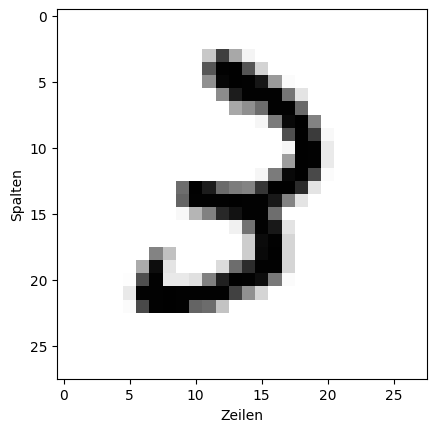

Auflösung des Bildes: 28 * 28 
Gesamtanzahl der Pixel: 784


In [14]:
print("Ziffer:", test_labels[63])
ziffer = test_images[63]
ziffer = ziffer.reshape(28, 28)
plt.imshow(ziffer, cmap = plt.cm.binary,
           interpolation="nearest")
plt.xlabel("Zeilen")
plt.ylabel("Spalten")
plt.show()
print("Auflösung des Bildes:",len(ziffer),"*",len(ziffer[0]),"\nGesamtanzahl der Pixel:", len(ziffer)*len(ziffer[0]))

Diese Ziffer ist für den Menschen eindeutig als 3 erkennbar, wird von unserem Modell jedoch als 2 erkannt. Es stellt sich also die Frage, wie unser vorhandenes neuronales Netz optimiert werden kann um die accuracy, also den Prozentsatz wie viele der predictions wahr sind, zu verbessern.


## Berechnung der Relevanz des ersten Modells



In [15]:
tp = 0
fn = 0
for i in range(len(test_labels)):
    if test_labels[i] == 8:
        p = model.predict(test_images[i].reshape(1,28,28,1), verbose = False )
        if p.argmax() == 8:
            tp += 1
        else:
            fn += 1
relevance1 = tp/(tp+fn)
print(relevance1)

0.8757700205338809


Durch den Quelltext, wird exemplarisch die Relevanz der Zahl 8 berechnet. Es wird also errechnet wie viele der Ziffern, welche als 8 klassifiziert wurden auch tatsächlich eine 8 sind. 87,58% lassen hierbei noch Spielraum für Optimierungen.


## Berechnung der Sensitivität des ersten Modells



In [16]:
tp = 0
fn = 0
for i in range(len(test_labels)):
    p = model.predict(test_images[i].reshape(1,28,28,1), verbose = False)
    if p.argmax() == 8:
        if test_labels[i] == 8:
            tp += 1
        else:
            fn += 1
sensitivity1= tp/(tp+fn)
print(sensitivity1)

0.9064824654622742


Durch den Quelltext, wird exemplarisch die Sensitivität der Zahl 8 berechnet. Es wird also errechnet wie viele der 8ten des Datensatzes auch als 8 klassifiziert wurden. Auch hierbei lässt der Wert von 90,65% noch Spielraum für Optimierung.


## Berechnung des F\-Scores des ersten Modells



In [17]:
F1 = 2 * ((relevance1*sensitivity1)/(relevance1+sensitivity1))
print(F1)

0.8908616187989556


Mit der Relevanz und der Sensitivität anhand der 8 als Beispiel, kommen wir auf einen F\-Score von 89,09 anhand der Daten der Ziffer 8. Den F\-Score für das gesamte Modell könnte errechnet werden, indem Relevanz und Sensitivität für jede einzelne Ziffer bestimmt wird und aus diesen dann der Durchschnittswert errechnet wird. Der F\-Scores unseres Modells für die Ziffer 8 soll uns jedoch genügen um das Modell später mit dem zweiten Modell vergleichen zu können.


# Das zweite MNIST\-Modell



In Kapitel 3.1 haben wir uns bereits mit den Arten von neuronalen Netzes beschäftigt, darunter auch mit convolutional neural networks. Der Vorteil dieser neuronalen Netze ist, dass die Bilder, bevor das Modell mit diesen trainiert, gefiltert werden. Dadurch werden bestimmte Eigenschaften der Bilder hervorgehoben, beispielsweise gerade Kanten von Ziffern. Wie bereits thematisiert, wird das Modell im Anschluss darauf trainiert iese Eigenschaften bei den Inputbildern zu erkennen und anhand von diesen die Ziffer zu Klassifizieren. Mit diesem Wissen wollen wir nun ein neues Modell und neuronales Netz erstellen, mit höherer accuracy als dies bei dem ersten Modell der Fall war. 

Im Folgenden bauen wir uns nun also ein neues künstliches neuronales Netz und Modell:



In [18]:
model2 = tf.keras.models.Sequential()

model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=[5, 5], activation="relu"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=[2, 2]))

model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=[5, 5], activation="relu"))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=[2, 2]))

## Sequential

Es wird also ein einfaches 2 dimensionales neuronales Netz mithilfe des von TensorFlow bereitgestellten Modells _Sequential_ aufgestellt.

Dieses Modell beinhaltet die Schichten, Knoten sowie Eingabe\- und Ausgabetensoren, welche benötigt werden um an diesem Modell beim Trainieren Veränderungen vorzunehmen. Dieser lineare Schichtenstapel wird dann in der Variable _model_ gespeichert.



## Conv2D

Im nächsten Schritt \(Zeile 3 und Zeile 4\) werden die ersten 2 Schichten des neuronalen Netzes aufgebaut, indem diese jeweils mit sogenannten Filtern \(Kerneln\) und einer Aktivierungsfunktion. Auf die Filter wird genauer im nächsten Kapitel eingegangen.

Die Aktivierungsfunktion \(_relu_\) wird im Zusammenhand mit der Klassifizierung im MNIST\-Datensatz verwendet, da sich der Schwellwert aufgrund der Grauwerte sehr gut eignet. Dies lieht daran, dass das Neuron feuert, falls es einen Wert größer 0 ist, da dann genau dieser Pixel als hoher Grauwert identifiziert wird. Andernfalls wird eine 0 ausgegeben, damit das Modell mit dieser weiterhin arbeiten kann.



## Filter

Die 32 Filter sorgen für das erste Filtern der Bilder, bevor man mit dem vertieften Lernen und Trainieren des neuronalen Netzes beginnt. Filter funktionieren, indem jeder Grauwert des Bildes mit dem Wert im Filter multipliziert wird und dann dadurch ein neuer gewichteter Wert entstehen kann. Mithilfe dieses neu errechneten Wertes können dem Bildinhalte, welche für die Erkennung der Zahlen zu vernachlässigen sind im Modell unterdrückt beziehungsweise ausgeblendet werden. Es gibt beispielsweise Filter, welche sich eher auf horizontale und eher auf vertikale Linien fokussieren, da sie die restlichen Grauwerte innerhalb des Filters mit einer positiven natürlichen Zahl multiplizieren und dadurch für das Pooling deutlich wertender machen. Filter können sich zudem auf Ecken oder Kanten einer gezeichneten Zahl spezialisieren, wodurch es dem künstlichen neuronalen Netz vor dem Training erleichtert wird, die Zahlen anhand ihrer eindeutig gemachten Kanten besser zu erkennen als vorher. Wie groß diese Filter dann sind, bestimmt die sogenannte _kernel\_size_. Während des Lernprozesses des neuronalen Netzes wird dann bestimmt, welche Filter durch ihre Eigenschaften am besten passen und welche eher unbrauchbarer zur Klassifizierung der Zahlen sind.



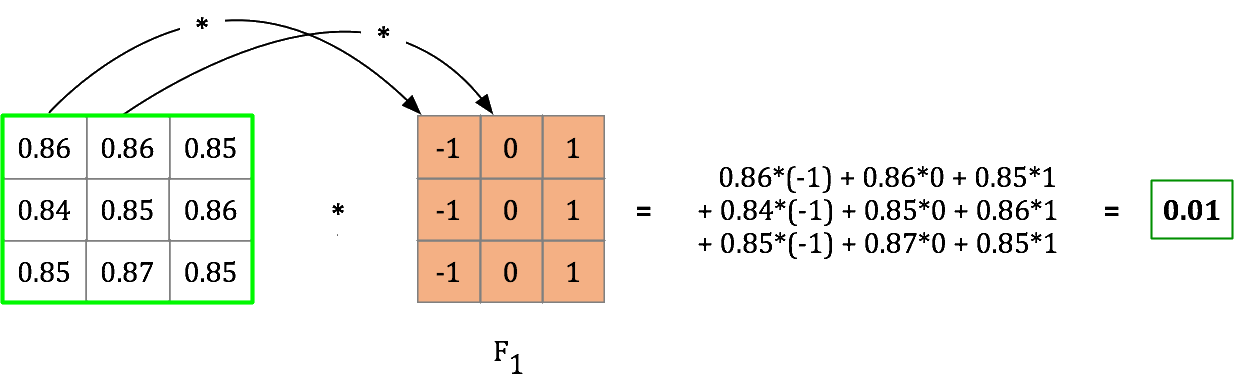


 Abbildung 2: Beispielberechnung eines Filters 



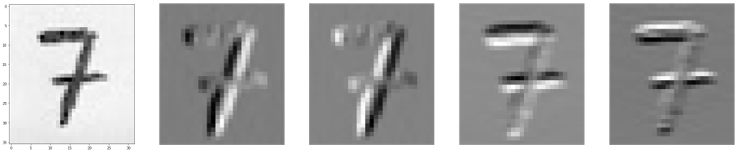


 Abbildung 3: Beispiel eines angewandten Filters


In [19]:
display(Image("Abbildung 2.png"))
print("\n Abbildung 2: Beispielberechnung eines Filters \n")
display(Image("Abbildung 3.png"))
print("\n Abbildung 3: Beispiel eines angewandten Filters")

In der 2. Abbildung erkennt man, inwiefern die Filter rechnen. Jeder Grauwert des der einzelnen Pixel wird mir der dazugehörigen Zahl im Filter multipliziert. Am Ende werden diese Werte dann addiert und man erhält einen neuen Wert für den im Filter zentrierten Pixel. In diesem Fall wird der Filter $F_1$ dazu verwendet, um die rechte vertikale Kante der Zahl hervorzuheben, da er durch seine Eigenschaft \(linke Pixelwerte des Ausschnittes werden mir \-1 multipliziert und rechte mit \+1\) die rechte vertikale Kante der 7 stärker gewichtet als die linke. Da der Filter pixelweise verschoben wird, wirken sich die Grauwerte der benachbarten Pixel ebenfalls auf den neuen Wert aus \(mehr dazu findet man in dem nächsten Abschnitt zum Pooling\).

In der 3. Abbildung kann man erkennen, dass sich das erste Bild stark von den anderen abhebt, was daran liegt, dass dieses Bild die ungefilterte 7 darstellt. Das 2. Bild dieser Abbildung stellt die Zahl 7 mit einem Filter dar, welcher auf die Erkennung linken vertikalen Kante ausgerichtet ist. Analog funktioniert dies mit dem 3. Bild der Abbildung, wobei der Filter auf die rechte Seitenkante der Zahl ausgelegt ist. In dem 4. und 5. Bild wurden Filter angewandt die sich jeweils auf die obere und untere horizontale Kante ausrichten.

Des Weiteren werden diese Werte dann in einem Poolingverfahren \(_MaxPooling2D_\) zusammengefasst.



## MaxPooling2D

Das _MaxPooling2D_ in Zeile 4 befasst sich mit der weiteren Filterung der Grauwerte der Pixel, indem es sich in diesem Fall jeweils 2 mal 2 Pixel Ausschnitte aus dem Bild nimmt und aus diesen 4 Grauwerten den größten bestimmt und diesen mit den anderen Maximalwerten zusammenfasst, sodass durch das "MaxPooling2D" das Bild in einem viertel der Datenmenge zusammenfasst werden kann.

Analog funktioniert es mit _Conv2D_ und _MaxPooling2D_ bei den darauffolgenden Schichten, jedoch wird dort die A<span style='font-size:small'>nzahl der Filter erh</span>öht, damit nach dem groben Filtern noch einem intensiveres Filtern ermöglicht wird.



In [20]:
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128))
model2.add(tf.keras.layers.Dense(10, activation="softmax"))
model2.compile(optimizer='adam',
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  metrics=['accuracy'])

Der oben stehende Quelltext ist gleich dem Quelltext des ersten Versuches, es kann also sehr gut aufgezeigt werden, welchen Einfluss die Filter auf den Trainingsprozess sowie die accuracy und den F\-Score des Modells haben.



In [21]:
model2.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.1, shuffle = True)

Epoch 1/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.1176 - accuracy: 0.9639 - val_loss: 0.0543 - val_accuracy: 0.9848
Epoch 2/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0486 - val_accuracy: 0.9860
Epoch 3/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0291 - accuracy: 0.9909 - val_loss: 0.0344 - val_accuracy: 0.9903
Epoch 4/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0339 - val_accuracy: 0.9902
Epoch 5/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.0339 - val_accuracy: 0.9917
Epoch 6/10
1688/1688 [==============================] - 23s 13ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0342 - val_accuracy: 0.9927
Epoch 7/10
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0398 -

In [22]:
evaluation_results = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 5ms/step - loss: 0.0460 - accuracy: 0.9896


Man sieht, dass die accuracy des neuen Modells dich deutlich gesteigert hat. Bei den Testdaten lag die accuracy bei 98,96%. also um mehr als 6% höher als die accuracy des ersten Modells und dies sogar mit 5 epochs weniger. Schauen wir uns nun an, ob unser neues Modell die 3, welche das erste Modell fälschlicherweise als 2 erkannt hat, richtig erkennt:



In [23]:
prediction2 = model2.predict(test_images[63].reshape(1, 28, 28, 1))
print("prediction des Modells:" ,prediction2.argmax())
print("Ziffer die dargestellt werden soll:",test_labels[63])

1/1 [==============================] - 0s 46ms/step
prediction des Modells: 3
Ziffer die dargestellt werden soll: 3


Die 3 wurde nun durch unser neues Modell richtig erkannt, für diese konkrete handgeschriebene Ziffer ist unser zweites Modell besser, da es die Ziffer richtig erkennt.


Um aufzuzeigen, wie wirksam die Filter sind, ist folgendes Beispiel geeignet :

Ziffer: 4


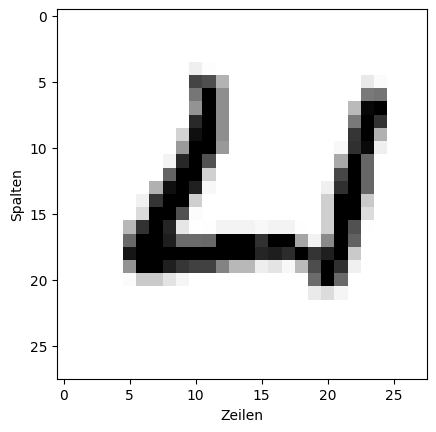

Auflösung des Bildes: 28 * 28 
Gesamtanzahl der Pixel: 784


In [24]:
print("Ziffer:", test_labels[33])
ziffer = test_images[33]
ziffer = ziffer.reshape(28, 28)
plt.imshow(ziffer, cmap = plt.cm.binary,
           interpolation="nearest")
plt.xlabel("Zeilen")
plt.ylabel("Spalten")
plt.show()
print("Auflösung des Bildes:",len(ziffer),"*",len(ziffer[0]),"\nGesamtanzahl der Pixel:", len(ziffer)*len(ziffer[0]))

Der Mensch würde diese Ziffer vermutlich nicht eindeutig als 4 erkennen, das Modell erkennt dies jedoch als 4, welches an der Erkennung der Kanten liegt. Hierbei lässt sich auch erneut der Unterschied zwischen den beiden Modellen aufzeigen: 


In [25]:
prediction3 = model.predict(test_images[33].reshape(1, 28, 28, 1))
prediction4 = model2.predict(test_images[33].reshape(1, 28, 28, 1))
print("prediction des ersten Modells:" ,prediction3.argmax())
print("prediction des zweiten Modells:", prediction4.argmax())
print("Ziffer die dargestellt werden soll:",test_labels[33])

1/1 [==============================] - 0s 16ms/step
prediction des ersten Modells: 6
prediction des zweiten Modells: 4
Ziffer die dargestellt werden soll: 4


Während unser erstes Modell in dem Bild eine 6 erkennt, erkennt das zweite Modell eine 4. 

Schauen wir uns abschließend die Relevanz und Sensitivität für das zweite Modell an, auch hierbei wählen wir wieder exemplarisch die Ziffer 8


## Berechnung der Relevanz des zweiten Modells



In [26]:
tp = 0
fn = 0
for i in range(len(test_labels)):
    if test_labels[i] == 8:
        p = model2.predict(test_images[i].reshape(1,28,28,1), verbose = False)
        if p.argmax() == 8:
            tp += 1
        else:
            fn += 1
relevance2 = tp/(tp+fn)
print(relevance2)

0.9948665297741273


Es lässt sich ein deutlicher Anstieg der Relevanz feststellen, auch hier wieder exemplarisch für die Ziffer 8. Die Relevanz beträgt nun 99,49%, demzufolge werden 99,49% der 8ten im MNIST Testdatensatz auch als 8 von unserem Modell klassifiziert. Die Relevanz für die Zahl 8 konnte durch unser zweites Modell also deutlich verbessert werden, eine Steigerung von beinahe 11%.


## Berechnung der Sensitivität des zweiten Modells



In [27]:
tp = 0
fn = 0
for i in range(len(test_labels)):
    p = model2.predict(test_images[i].reshape(1,28,28,1), verbose = False)
    if p.argmax() == 8:
        if test_labels[i] == 8:
            tp += 1
        else:
            fn += 1
sensitivity2 = tp/(tp+fn)
print (sensitivity2)

0.9857578840284842


Auch bei der Sensitivität lässt sich ein deutlicher Anstieg feststellen, ebenfalls exemplarisch für die Ziffer 8. Die Sensitivität beträgt nun 98,58%, das heißt das 99,58% der Ziffern, welche von unserem Modell als 8 klassifiziert wurden auch tatsächlich 8ten waren. Auch die Sensitivität für die Zahl 8 konnte durch unser zweites Modell deutlich gesteigert werden, mit einer Steigerung von beinahe 8%.


## Berechnung des F\-Scores des zweiten Modells



In [28]:
F2 = 2 * ((relevance2*sensitivity2)/(relevance2+sensitivity2))
print(F2)

0.9902912621359223


Logischerweise lässt sich auch beim F\-Score ein deutlicher Anstieg feststellen, da sowohl die Relevanz als auch die Sensitivität des Modells für die Zahl 8 gesteigert werden konnten. Der F\-Score konnte durch unser zweites Modell um fast 10% gesteigert werden. 


# Fazit



In unserer Ausarbeitung haben wir uns zunächst Grundlegend mit dem MNIST Datensatz beschäftigt und haben anschließend alle nötigen Grundlagen für den Aufbau eines Modells zur Klassifizierung der handgeschriebenen Ziffern im Datensatz MNIST. Mithilfe dieser Grundlagen haben wir im Anschluss mithilfe von TensorFlow ein feed forward neural network aufgebaut und dieses mithilfe des MNIST Datensatzes trainiert. Hierbei waren jedoch die accuracy sowie auch der F\-Score und damit verbunden die Relevanz und Sensitivität noch steigerbar, weshalb wir ein zweites Modell, basierend auf einem convolutional neural network, erstellt und trainiert haben. Durch die Vorfilterung der Bilder und damit des Inputs des neuronalen Netzes, konnte die Genauigkeit, die Relevanz, die Sensitivität sowie der F\-Score gesteigert werden. Es kann also gesagt werden, dass das zweite Modell besser für die Erkennung handgeschriebener Ziffern geeignet ist. 



Fabio Schumacher und Niklas Dziwisch

Introduction to Data Science \(WWI 22DSB\) Prof. Dr. Bernhard Drabant

Abgabe: 09.12.2022



# Quellenverzeichnis



**C**

\[[https://www.computerweekly.com/de/definition/Backpropagation\-Algorithmus](https://www.computerweekly.com/de/definition/Backpropagation-Algorithmus) \]\([https://www.computerweekly.com/de/definition/Backpropagation\-Algorithmus\#](https://www.computerweekly.com/de/definition/Backpropagation-Algorithmus#)\) \(zuletzt aufgerufen: 22.11.2022\)

[https://dlapplications.github.io/2018\-07\-17\-cnn\-introduction/\#2\-mạng\-nơ\-ron\-tích\-chập\-convolutional\-neural\-network](https://dlapplications.github.io/2018-07-17-cnn-introduction/#2-m%E1%BA%A1ng-n%C6%A1-ron-t%C3%ADch-ch%E1%BA%ADp-convolutional-neural-network)  \(zuletzt aufgerufen: 01.12.2022\)

**D**

Deru, Matthieu/Ndiaye, Alassane: Deep Learning mit TensorFlow, Keras und TensorFlow.js. Bonn 2020

[https://datascience.eu/de/maschinelles\-lernen/relu\-aktivierungsfunktion/](https://datascience.eu/de/maschinelles-lernen/relu-aktivierungsfunktion/) \(zuletzt abgerufen: 16.11.2022\)

[https://databasecamp.de/ki/gradientenverfahren\-ein\-steiler\-abstieg\#Wofuer\_nutzt\_man\_das\_Gradientenabstiegsverfahren](https://databasecamp.de/ki/gradientenverfahren-ein-steiler-abstieg#Wofuer_nutzt_man_das_Gradientenabstiegsverfahren) \(zuletzt aufgerufen: 28.11.2022\)

**H**

[https://hack\-deck.de/gradientenverfahren\-einfach\-erklaert\-beispiel](https://hack-deck.de/gradientenverfahren-einfach-erklaert-beispiel)  \(zuletzt aufgerufen: 28.11.2022\)

**I**

[https://www.ibm.com/cloud/learn/gradient\-descent](https://www.ibm.com/cloud/learn/gradient-descent) \(zuletzt aufgerufen: 26.11.2022\)

**M**

https://matplotlib.org/ \(zuletzt aufgerufen \(03.12.2022\)

**N**

http://www.neuronalesnetz.de/aktivitaet.html \(zuletzt abgerufen: 18.11.2022\)

**T**

Tensorflow \(Quellen zu dem Quelltext\):

[https://www.tensorflow.org/api\_docs/python/tf/keras/layers/Conv2D?version=nightly](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D?version=nightly) \(zuletzt abgerufen: 04.12.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras/layers/MaxPool2D?version=nightly](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D?version=nightly) \(zuletzt abgerufen: 11.11.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras?version=nightly](https://www.tensorflow.org/api_docs/python/tf/keras?version=nightly) \(zuletzt abgerufen: 12.11.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras/layers/Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) \(zuletzt abgerufen: 13.11.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras/layers/Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) \(zuletzt abgerufen: 16.11.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras/layers/Dense?version=nightly](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=nightly) \(zuletzt abgerufen: 21.12.2022\)

[https://www.tensorflow.org/api\_docs/python/tf/keras/Model?version=nightly](https://www.tensorflow.org/api_docs/python/tf/keras/Model?version=nightly) \(zuletzt abgerufen: 03.12.2022\)

[https://www.tensorflow.org/guide/keras/sequential\_model\#when\_to\_use\_a\_sequential\_model](https://www.tensorflow.org/guide/keras/sequential_model#when_to_use_a_sequential_model) \(zuletzt abgerufen: 03.12.2022\)

[https://www.tensorflow.org/guide/keras/customizing\_what\_happens\_in\_fit](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit) \(zuletzt abgerufen 04.12.2022\)

Weitere Quellen: 

[https://towardsdatascience.com/no\-kernels\-filters\-are\-not\-the\-same\-b230ec192ac9](https://towardsdatascience.com/no-kernels-filters-are-not-the-same-b230ec192ac9) \(zuletzt abgerufen: 01.12.2022\)

**W**

Wilmott, Paul: Machine Learning. An Applied Mathematics Introduction. Verlagsort ohne Angaben. 2019 

[https://de.wikipedia.org/wiki/Rekurrentes\_neuronales\_Netz](https://de.wikipedia.org/wiki/Rekurrentes_neuronales_Netz) \(17.11.2022\)

**Y**  

https://yann.lecun.com/exdb/mnist/ \(zuletzt abgerufen: 23.10.2022\)

https://www.youtube.com/watch?v=bRyOi0L6Rs8 \(zuletzt abgerufen: 22.11.2022\)

https://www.youtube.com/watch?v=RpQQbMQb8qI \(zuletzt abgerufen: 03.12.2022\)

